![banner](./images/banner.png "banner")

# Modelo de aprendizaje automático para la predicción del Ratio Internacional Normalizado (INR) en pacientes bajo terapia con Antagonistas de la Vitamina K

## Tabla de contenidos

- [1. Descripción del proyecto](#1-descripción-del-proyecto)
  - [1.1 Objetivos](#11-objetivos)
  - [1.2 Datos](#12-datos)
  - [1.3 Software](#13-software)

- [2. Exploración y visualización de datos](#2-exploracion-y-visualizacion-de-datos)
  - [2.1 Carga de datos](#21-carga-de-datos)
  - [2.2 Generación del csv](#22-generacion-del-csv)
    - [2.2.1 Simplificación de las variables y pivotación](#221-simplificacion-de-las-variables-y-pivotacion)
  - [2.3 Limpieza de datos](#23-limpieza-de-datos)
      - [2.3.1 Valores faltantes y types](#221-simplificacion-de-las-variables-y-pivotacion)
      - [2.3.2 Duplicados](#221-simplificacion-de-las-variables-y-pivotacion)
      - [2.3.3 Eliminación de variables redundantes o irrelevantes](#221-simplificacion-de-las-variables-y-pivotacion)
      - [2.3.4 Rangos y estadistica basica](#221-simplificacion-de-las-variables-y-pivotacion)
      - [2.3.4 Valores únicos](#221-simplificacion-de-las-variables-y-pivotacion)
  - [2.4 Feature Importance y análisis de la variable target](#24-feature-importance-y-analisis-de-la-variable-target)
    - [2.4.1 Oversampling data](#241-oversampling-data)


## 1. Descripción del proyecto


Este proyecto aborda un problema de **predicción de un valor continuo**. Se trata de una tarea supervisada: el modelo aprende a partir de un conjunto amplio de ejemplos donde todas las columnas, incluida la variable target, están completas. Una vez entrenado, aplicamos el modelo a nuevas filas en las que falta precisamente ese valor que queremos estimar. Las columnas con información siempre disponible se denominan características o features.

La variable target puede tomar distintos valores, incluyendo valores inferiores a 1.0 o superiores a 3.0 correspondientes a las mediciones del INR (Ratio Internacional Normalizado). Al ser un valor continuo, la **metodología adecuada es la regresión**.

Si los datos no vinieran etiquetados, si no conociéramos el target desde el inicio, sería necesario recurrir a técnicas de aprendizaje no supervisado, donde el modelo identifica patrones o grupos sin una referencia previa.

En nuestro caso, ajustaremos diferentes modelos de regresión sobre datos de pacientes en tratamiento anticoagulante y elegiremos el que ofrezca el mejor rendimiento. Para evaluar de forma fiable el comportamiento del modelo, dividimos el conjunto de datos en tres partes:

- Conjunto de entrenamiento: contiene los datos completos, incluidos los valores reales del target. Sirven para que el modelo aprenda las relaciones entre las características y la variable objetivo.

- Conjunto de validación: simulamos datos “nuevos” separando previamente el target y ocultándolo al modelo. Tras el entrenamiento, comparamos sus predicciones con los valores reales reservados. Como este conjunto se usa repetidamente para ajustar parámetros, existe el riesgo de que el modelo se adapte demasiado a él y pierda capacidad de generalización (sobreajuste o overfitting).

- Conjunto de prueba: incluye ejemplos completamente nuevos para el modelo entrenado y validado. Es la comprobación final del rendimiento y nos permite estimar cómo respondería ante datos reales que aún no hemos observado.


#### Este proyecto contendrá:

- La preparación y limpieza de los datos para que puedan ser utilizados por los modelos de predicción. `Exploration_and_Classification.ipynb`

- La selección de la métrica de rendimiento más adecuada para evaluar la calidad de las predicciones del modelo. `Exploration_and_Classification.ipynb`

- El entrenamiento de los modelos de regresión, ajustando sus parámetros para optimizar la métrica seleccionada. `ModelTraining_and_Conclusions.ipynb`

- La aplicación de los modelos a nuevos datos para generar predicciones de la variable objetivo. `ModelTraining_and_Conclusions.ipynb`

- La evaluación del rendimiento final del modelo comparando sus predicciones con los valores reales de la variable objetivo. `ModelTraining_and_Conclusions.ipynb`

- Un análisis de explicabilidad para comprender cómo el modelo toma sus decisiones y cuáles características influyen más en las predicciones. `XAI.ipynb`

- La cuantificación de la incertidumbre asociada a las predicciones, para entender la confianza que podemos tener en los resultados del modelo. `UQ.ipynb`

### 1.1 Objetivos

El objetivo de este proyecto es **predecir el valor del INR de pacientes bajo tratamiento con anticoagulantes** utilizando variables analíticas, hábitos de vida y otros factores de riesgo relevantes. Este análisis permite identificar patrones que influyen en el INR, facilitando la detección temprana de posibles complicaciones y apoyando la prevención de diagnósticos complejos.

### 1.2 Datos

El conjunto de datos utilizado para entrenar y evaluar nuestro modelo proviene de una **fuente externa fiable de pacientes reales en España (Cataluña)**. Esta información es crucial para el desarrollo de un modelo con **relevancia clínica y aplicabilidad directa** en nuestro entorno sanitario.

Estos registros incluyen una variedad de información clínica, abarcando **datos clínicos básicos**, **resultados de pruebas de hematología y de seguimiento**, además de las **medidas de INR (International Normalized Ratio)** que son fundamentales para el seguimiento de la terapia anticoagulante. Todos los datos han sido **rigurosamente anonimizados** para garantizar la protección de la privacidad de los pacientes y **cumplir estrictamente con las regulaciones de protección de datos vigentes**. Gracias a esta base de datos real, podemos desarrollar y validar modelos en un contexto clínico auténtico y específico, asegurando la calidad y utilidad predictiva para la toma de decisiones médicas.

Los datos obtenidos se dividen en distintas pestañas de un unico archivo excel.


#### Variables
| | Column Name | Data Type | Description |
|-|-------------|-----------|-----------|
| | CODI_PACIENT | Cadena de caracteres (`ID0000`) | Identificador del paciente |
| | DATA | Fecha formato (`MM-yyyy`) | Fecha mensual del registro de los datos |
| | DESCRIPCIO VARIABLE | Cadena | Descripción de la medición |
| | VALOR | Número | Valor de la medición |
| | DESCRIPCIO VALOR | String | Descripción del valor medido |


#### Patologia
| | Column Name | Data Type | Description |
|-|-------------|-----------|-----------|
| | CODI_PACIENT | Cadena de caracteres (`ID0000`) | Identificador del paciente |
| | DIAGNÒSTIC ASSOCIAT | Cadena | Descripción de la patología del paciente |


#### Proves Lab
| | Column Name | Data Type | Description |
|-|-------------|-----------|-----------|
| | CODI_PACIENT | Cadena de caracteres (`ID0000`) | Identificador del paciente |
| | DATA | Fecha formato (`MM-yyyy`) | Fecha mensual del registro de los datos |
| | DESCRIPCIO PROVA | Cadena | Descripción de la medición |
| | VALOR | Número | Valor de la medición |
| | UNITATS_LAB| String | Tipo de unidad del valor medido |


#### Param Coag
| | Column Name | Data Type | Description |
|-|-------------|-----------|-----------|
| | CODI_PACIENT | Cadena de caracteres (`ID0000`) | Identificador del paciente |
| | DATA | Fecha formato (`MM-yyyy`) | Fecha mensual del registro del control |
| | DESCRIPCIO VARIABLE | Cadena (`INR`) | Descripción de la medición |
| | VALOR | Número | Valor de la medición del INR |


#### Hematologia
| | Column Name | Data Type | Description |
|-|-------------|-----------|-----------|
| | CODI_PACIENT | Cadena de caracteres (`ID0000`) | Identificador del paciente |
| | DATA | Fecha formato (`MM-yyyy`) | Fecha mensual del registro del control |
| | DESCRIPCIO PROVA | Cadena | Descripción de la medición |
| | VALOR | Número | Valor de la medición del INR |
| | UNITATS_LAB| String | Tipo de unidad del valor medido |

La variable **target** que utilizaremos en este análisis se encuentra dentro de la pestaña *Param Coag* y corresponde al valor INR de los pacientes bajo tratamiento con anticoagulantes. Esta variable es continua y representa el riesgo de que un paciente desarrolle complicaciones cardíacas, interpretándose de la siguiente manera:

- **INR < 2.0:** el paciente presenta riesgo de padecer una cardiopatía.

- **INR entre 2.0 y 3.0:** el paciente se encuentra dentro del rango terapéutico, por lo que no presenta riesgo significativo de cardiopatía.

- **INR > 3.0:** aunque el INR es elevado, el paciente no se considera en riesgo de cardiopatía para los efectos de este análisis, aunque sí puede indicar riesgo de hemorragias u otras complicaciones.

Esta definición nos permite utilizar el INR como variable objetivo para entrenar modelos de predicción que puedan estimar el riesgo clínico basado en los datos del paciente.

## 1.3 Software

Importamos las siguientes librerías:

In [136]:
import pandas as pd
import numpy as np

#utils files
from utils.cleaner_data import *
from utils.cleaner_shorten_diagnoses import *

# data exploration and preparation  
from sklearn.feature_selection import mutual_info_classif
from functools import reduce

# plotting and displaying in the notebook
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import display
from sklearn import tree

#SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

#model evaluation
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression



# 2. Exploración y visualización de datos

## 2.1 Carga de datos

Vamos a cargar los datos del fichero `Estudi_Anticoagulants.csv`, empezaremos por la ventana de variables:

In [137]:
df_variables =  pd.read_excel("data/Estudi_Anticoagulants.xlsx", sheet_name="VARIABLES")
df_variables.head()
#df_variables.info()

,CODI_PACIENT,DATA,DESCRIPCIO VARIABLE,VALOR,DESCRIPCIO VALOR
0,ID0002,01/2024,Potasi (K) Sèric,58.00,NaN
1,ID0003,01/2024,Ara fuma?,0.00,No
2,ID0003,01/2024,Tipus d'intervenció tabac,1.00,Reforç de conducta
3,ID0003,01/2024,IMC - Índex de Massa Corporal,24.01,NaN
4,ID0003,01/2024,Pressió Arterial Diastòlica,55.00,NaN


El conjunto de datos contiene información de **118.014 pacientes y 5 columnas** que describen sus características básicas a nivel médico, incluyendo aspectos bioquímicos, indicadores de hábitos de salud, medidas corporales y signos vitales.

Vamos a cargar los datos de la siguiente ventana `PROVES LAB`

In [138]:
df_labTest = pd.read_excel("data/Estudi_Anticoagulants.xlsx", sheet_name="PROVES LAB")
df_labTest.head()
#df_labTest.info()

,CODI_PACIENT,DATA,DESCRIPCIO PROVA,VALOR,UNITATS_LAB
0,ID0003,01/2024,"ALANINA AMINOTRANSFERASA (GPT/ALT), SUERO","10,80",U/L
1,ID0003,01/2024,Microalbuminuria /L,"<3,00",g/L
2,ID0003,01/2024,"ASPARTATO AMINOTRANSFERASA (GOT/AST), SUERO","15,60",U/L
3,ID0003,01/2024,"BILIRRUBINA TOTAL, SUERO","0,40",mg/dL
4,ID0003,01/2024,"CREATININA, SUERO","0,70",mg/dL


El conjunto de datos contiene información de **9.924 pacientes y 5 columnas** que reflejan su estado bioquímico y funcional, abarcando marcadores hepáticos, renales y metabólicos. En conjunto, proporciona una visión más especifica del perfil clínico de cada paciente.

Vamos a cargar los datos de la siguiente ventana `PARAM COAG`:

In [139]:
df_INR = pd.read_excel("data/Estudi_Anticoagulants.xlsx", sheet_name="PARAM COAG")
df_INR.head()
#df_INR.info()

,CODI_PACIENT,DATA,DESCRPCIO VARIABLE,VALOR
0,ID0009,03/2024,INR,4.3
1,ID0009,03/2024,INR,7.0
2,ID0009,03/2024,INR,4.4
3,ID0044,11/2024,INR,2.8
4,ID0044,11/2024,INR,1.5


Este conjunto de datos es considerablemente amplio, con **1969  registros y 5 variables** que describen los controles de INR realizados a los pacientes.

Dentro de este conjunto se identifica nuestra **variable objetivo 'target', que indica si el paciente cuenta con un registro de INR** y el valor correspondiente. Esta variable permite evaluar la presencia y magnitud de dicha medición, siendo la clave de este análisis.

Vamos a cargar los datos de la siguiente ventana `HEMATOLOGIA`:

In [140]:
df_hematology = pd.read_excel("data/Estudi_Anticoagulants.xlsx", sheet_name="HEMATOLOGIA")
df_hematology.head()
#df_hematology.info()

,CODI_PACIENT,DATA,DESCRIPCIO PROVA,VALOR,UNITATS_LAB
0,ID0003,01/2024,Hematocrito,"32,20",%
1,ID0003,01/2024,Hemoglobina,"10,30",g/dL
2,ID0003,01/2024,Hematíes,"3,28",10Exp12/L
3,ID0003,01/2024,Volumen corpuscular medio,"98,20",fL
4,ID0003,01/2024,Conc.Hb.Corpuscular Media,"32,10",g/dL


Vamos a cargar los datos de la siguiente ventana `PATOLOGIA`:

In [141]:
df_patology = pd.read_excel("data/Estudi_Anticoagulants.xlsx", sheet_name="PATOLOGIA")
df_patology.head()
#df_patology.info()

,CODI_PACIENT,DIAGNÒSTIC ASSOCIAT
0,ID8035,"CIRROSI HEPÀTICA ALCOHÒLICA, SENSE ASCITES"
1,ID1745,FIBRIL·LACIÓ AURICULAR NO ESPECIFICADA
2,ID6185,FIBRIL·LACIÓ AURICULAR CRÒNICA
3,ID12021,FIBRIL·LACIÓ AURICULAR PERMANENT
4,ID7015,FIBRIL·LACIÓ AURICULAR NO ESPECIFICADA


Este conjunto de datos tiene, con **310  registros y 2 variables** que describen las patologias que tiene los pacientes que se presentan al control.

## 2.2 Generación del csv

### 2.2.1 Agrupación y pivotación

Disponemos de un registro casi mensual de los datos de cada paciente, pero nuestro objetivo es identificar qué valores influyen más en esta medición. En cada conjunto de datos, agruparemos por el ID del paciente y por la descripción, conservando el valor promedio de cada medida. Posteriormente, realizaremos un pivoteo para transformar las filas en columnas. Todos los datos se encuentran interrelacionados mediante el campo CODI_PACIENT.

**Variables clínicas iniciales: agrupamos y pivotamos.**

In [142]:
df_variables_gruped = (
    df_variables.groupby(["CODI_PACIENT", "DESCRIPCIO VARIABLE"])
      .mean(numeric_only=True)
      .reset_index()
)

# Limpiar nombres de variables
df_variables_gruped['DESCRIPCIO VARIABLE'] = df_variables_gruped['DESCRIPCIO VARIABLE'].str.strip()

# Convertir valores a string (si hay mezcla de tipos)
df_variables_gruped['VALOR'] = df_variables_gruped['VALOR'].astype(str)

# Pivot seguro
df_variables_gruped_pivot = df_variables_gruped.pivot_table(
    index='CODI_PACIENT',
    columns='DESCRIPCIO VARIABLE',
    values='VALOR',
    aggfunc='first'  # toma el primer valor si hay duplicados
).reset_index()

df_variables_gruped_pivot = df_variables_gruped_pivot.rename_axis(None, axis=1)
df_variables_gruped_pivot.head()

,CODI_PACIENT,Activitat exercici en consulta,Ara fuma?,Cigarretes/dia,Colesterol total,Consell consum d'alcohol,Cribratge abús alcohol (Audit-C),Cribratge alimentació,Etapa canvi. Activitat física,Freqüència cardíaca,...,Qüestionari CBPAAT d'activitat física,Ritme cardíac,Sedestació interrompuda,Temps assegut (h/d),Test dep. nicotina (Fagerström) breu,Tipus d'exposició ambiental de tabac,Tipus d'intervenció tabac,Tipus de tabac,Valoració resultat AUDIT-C,Voldria deixar de fumar?
0,ID0002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ID0003,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,75.66666666666667,...,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2,ID0004,NaN,0.0,NaN,NaN,NaN,1.5,NaN,NaN,74.5,...,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
3,ID0005,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ID0006,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,90.0,...,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


**Pruebas de laboratorio: agrupamos y pivotamos.**

In [143]:
 #Convertir VALOR a numérico (primero reemplazar comas si las hay)
df_labTest["VALOR"] = (
    df_labTest["VALOR"]
        .astype(str)
        .str.replace(",", ".", regex=False)
)

df_labTest["VALOR"] = pd.to_numeric(df_labTest["VALOR"], errors="coerce")

df_labTest_gruped = (
    df_labTest.groupby(["CODI_PACIENT", "DESCRIPCIO PROVA"])
      .mean(numeric_only=True)
      .round(2)
      .reset_index()
)
df_labTest_gruped_pivot = df_labTest_gruped.pivot_table(
    index='CODI_PACIENT',
    columns='DESCRIPCIO PROVA',
    values='VALOR',
    aggfunc='first'
).reset_index()

df_labTest_gruped_pivot = df_labTest_gruped_pivot.rename_axis(None, axis=1)

df_labTest_gruped_pivot.head()

,CODI_PACIENT,ALT (GPT),Creatinina,Glucosa,Potassi,Sodi,Urea,ALANINA AMINOTRANSFERASA (ALT) (GPT),"ALANINA AMINOTRANSFERASA (GPT/ALT), SUERO",ALANINA AMINOTRANSFERASA (SÈRUM); C.CAT.,...,Srml-Lactat-deshidrogenasa; c.cat.,UREA (SÈRUM); C.SUBST,UREA SERUM,UREA SÈRUM,UREA Sèrum,"UREA, SUERO",Urea sèrum,Urea sèrum (3091-6),Urea-Sèrum,Uri-Albúmina orina recent
0,ID0003,NaN,NaN,NaN,NaN,NaN,NaN,13.50,11.7,NaN,...,NaN,NaN,NaN,30.49,NaN,NaN,NaN,NaN,NaN,NaN
1,ID0009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ID0044,NaN,NaN,NaN,NaN,NaN,NaN,40.29,NaN,NaN,...,NaN,NaN,NaN,173.41,NaN,NaN,NaN,NaN,NaN,NaN
3,ID0046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.2,NaN,...,NaN,NaN,NaN,12.18,NaN,NaN,NaN,NaN,NaN,NaN
4,ID0073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Controles de INR: agrupamos y pivotamos.**

Los controles de INR se realizan cada dos semanas a los pacientes; por ello, calcularemos la media ponderada por tiempo. De esta manera obtendremos valores más precisos que usando únicamente la media simple.

In [144]:
 #Convertir VALOR a numérico (primero reemplazar comas si las hay)
df_INR["VALOR"] = (
    df_INR["VALOR"]
        .astype(str)
        .str.replace(",", ".", regex=False)
)

df_INR["VALOR"] = pd.to_numeric(df_INR["VALOR"], errors="coerce")
df_INR['DATA'] = pd.to_datetime(df_INR['DATA'])

# Ordenamos por paciente y fecha
df_INR = df_INR.sort_values(['CODI_PACIENT', 'DESCRPCIO VARIABLE', 'DATA'])

# Calculamos diferencia en meses entre fechas consecutivas por paciente y variable
df_INR['diff_months'] = df_INR.groupby(['CODI_PACIENT', 'DESCRPCIO VARIABLE'])['DATA'].diff().dt.days / 30
df_INR['diff_months'] = df_INR['diff_months'].fillna(1)  # Primer valor pondera 1 mes mínimo

# Media ponderada por tiempo
df_INR_gruped = df_INR.groupby(['CODI_PACIENT', 'DESCRPCIO VARIABLE']).apply(
    lambda x: (x['VALOR'] * x['diff_months']).sum() / x['diff_months'].sum()
).reset_index(name='VALOR')

# Redondeamos a 2 decimales
df_INR_gruped['VALOR'] = df_INR_gruped['VALOR'].round(2)

df_INR_gruped_pivot = df_INR_gruped.pivot_table(
    index='CODI_PACIENT',
    columns='DESCRPCIO VARIABLE',
    values='VALOR',
    aggfunc='first'
).reset_index()

df_INR_gruped_pivot = df_INR_gruped_pivot.rename_axis(None, axis=1)

df_INR_gruped_pivot.head()

C:\Users\VALER\AppData\Local\Temp\ipykernel_11040\2294238822.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_INR['DATA'] = pd.to_datetime(df_INR['DATA'])
C:\Users\VALER\AppData\Local\Temp\ipykernel_11040\2294238822.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_INR_gruped = df_INR.groupby(['CODI_PACIENT', 'DESCRPCIO VARIABLE']).apply(


,CODI_PACIENT,INR
0,ID0009,4.30
1,ID0044,2.80
2,ID0046,2.12
3,ID0073,2.77
4,ID0079,2.36


**Hematologia: agrupamos y pivotamos.**

In [145]:
 #Convertir VALOR a numérico (primero reemplazar comas si las hay)
df_hematology["VALOR"] = (
    df_hematology["VALOR"]
        .astype(str)
        .str.replace(",", ".", regex=False)
)

df_hematology["VALOR"] = pd.to_numeric(df_hematology["VALOR"], errors="coerce")

df_hematology_gruped = (
    df_hematology.groupby(["CODI_PACIENT", "DESCRIPCIO PROVA"])
      .mean(numeric_only=True)
      .round(2)
      .reset_index()
)
df_hematology_gruped_pivot = df_hematology_gruped.pivot_table(
    index='CODI_PACIENT',
    columns='DESCRIPCIO PROVA',
    values='VALOR',
    aggfunc='first'
).reset_index()

df_hematology_gruped_pivot = df_hematology_gruped_pivot.rename_axis(None, axis=1)

df_hematology_gruped_pivot.head()

,CODI_PACIENT,Basòfils,Eosinòfils,Limfòcits,Monòcits,Neutròfils segmentats,Amplitud distribució eritrocitària (ADE),Conc. hemoglobina corpuscular mitjana (CHCM),Hematíes,Hematòcrit,...,VCM,VCM (787-2),VOLUM CORPUSCULAR MIG,VOLUM PLAQUETAR MIG,VPM,Volum corpuscular mig (VCM),Volum corpuscular mitjà-Sang,Volum plaquetari mig,Volum plaquetari mitjà-Sang,Volumen corpuscular medio
0,ID0003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,95.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.42
1,ID0009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.70
2,ID0044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,103.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ID0046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,86.40,NaN,NaN,NaN,NaN,93.77,NaN,9.9,NaN,91.50
4,ID0073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.60


**Patologias: simplemente agrupamos**

In [146]:
df_patology_gruped = (
    df_patology.groupby(["CODI_PACIENT", "DIAGNÒSTIC ASSOCIAT"])
      .mean(numeric_only=True)
      .round(2)
      .reset_index()
)

In [147]:
df_patology_gruped['DIAGNÒSTIC ASSOCIAT'].unique()

array(['FLEBITIS I TROMBOFLEBITIS VASOS PROFUNDS NE EXTREM. INF. NE',
       'FIBRIL·LACIÓ AURICULAR NO ESPECIFICADA',
       'ALETEIG [FLUTTER] AURICULAR NO ESPECIFICAT',
       'TRASTORN NO REUMÀTIC DE LA VÀLVULA AÒRTICA NO ESPECIFICAT',
       "ALTRES TIPUS D'EMBÒLIA PULMONAR SENSE COR PULMONAR AGUT",
       'FIBRIL·LACIÓ AURICULAR PERMANENT',
       'FIBRIL·LACIÓ AURICULAR CRÒNICA',
       'ARRÍTMIA CARDÍACA NO ESPECIFICADA',
       "ÚS D'ANTICOAGULANTS A LLARG TERMINI (ACTUAL)",
       'EMBÒLIA I TROMBOSI DE VENA NO ESPECIFICADA, AGUDES',
       "ALT. TRAST. D'ARTÈRIES ARTERIOLES I CAPIL·LARS EN MAL. CAL",
       'MIOCARDIOPATIA DILATADA', 'INFART CEREBRAL NO ESPECIFICAT',
       'ALTRES TIPUS DE DESPOLARITZACIÓ PREMATURA',
       'ESTENOSI AÒRTICA NO REUMÀTICA (VÀLVULA)',
       "TRAST. D'ADAPTACIÓ MIXT D'ANSIETAT I ESTAT D'ÀNIM DEPRIMIT",
       "ATEROSCLEROSI D'ARTÈRIES NADIUES NE, EXTREMITAT NE",
       'ATAC ISQUÈMIC CEREBRAL TRANSITORI NO ESPECIFICAT',
       'TRASTORN NO RE

Los valores de las patologías no son uniformes ni concisos en el dataset. Por ello, utilizaremos la utilidad shorten_diagnoses para acortar y estandarizar los nombres de las variables.

In [148]:
df_patology_gruped = shorten_diagnoses(df_patology_gruped, column='DIAGNÒSTIC ASSOCIAT', inplace=False)

df_patology_gruped['DIAGNÒSTIC ASSOCIAT'].unique()

Shortened 0/300 variable names (0.0%)


array(['Flebitis_Profunda', 'FA_NE', 'Flutter_NE', 'Valv_Aort_NReum_NE',
       'EP_Other_No_CorPulm', 'FA_Perm', 'FA_Cron', 'Arritmia_NE',
       'Anticoagulant_LT', 'Trombosi_Venosa_Aguda', 'Alt_Art_Arter_Cap',
       'Miocardiopatia_Dilatada', 'Infart_Cerebral_NE',
       'Despol_Prem_Other', 'Estenosi_Aort_NReum', 'Trast_Adapt_Mixt',
       'Aterosclerosis_NE', 'AIT_NE', 'Valv_Mitral_NReum_NE', 'Sincop',
       'HSD_NE', 'Palpitacions', 'Taquicardia_Parox_NE', 'CI_Cron_NE',
       'Valv_Mitral_Reum_NE', 'IMEST_NE', 'Valvula_Protetica',
       'Insuf_Mitral_NReum', 'FA_Parox', 'Angina_NE',
       'Vasculopatia_Nec_NE', 'LES_NE', 'Bony_Mama_NE',
       'Insuf_Aort_NReum', 'Trast_Vascular_Intesti_NE',
       'Endocarditis_Cal', 'Hemoglobinopatia_Other',
       'Angiopatia_Periferica_NE', 'IC_NE', 'Insuf_Mitral_Reum',
       'Cirrosi_Alcoholica_NoAsc', 'SPT_NoComp_NE', 'FA_Cron_NE',
       'Flebitis_NE'], dtype=object)

Unimos todos los datasets mediante el identificador del paciente, con el objetivo de trabajar sobre un único conjunto de datos

In [149]:
# List of all DataFrames to merge
dfs = [df_INR_gruped_pivot, df_labTest_gruped_pivot, df_variables_gruped_pivot, df_hematology_gruped_pivot, df_patology_gruped]

# Merge all DataFrames on 'CODI_PACIENT' using left join
df_investig_INR = reduce(lambda left, right: left.merge(right, on='CODI_PACIENT', how='left'), dfs)

df_investig_INR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Columns: 472 entries, CODI_PACIENT to DIAGNÒSTIC ASSOCIAT
dtypes: float64(443), object(29)
memory usage: 490.6+ KB


Como podemos observar, algunas variables representan lo mismo o están descritas de formas diferentes. Por ello, utilizaremos la utilidad process_lab_data, que recorrerá los valores, registrará cambios cuando se trate de pacientes distintos y, además, renombrará las columnas con nombres más concisos y descriptivos.

In [150]:
df_investig_INR = process_lab_data(df_investig_INR)
df_investig_INR.info()

Iniciant el processament de les dades...
Columnes estandarditzades. 472 columnes originals -> 69 columnes netes.
Fusió completada. Files originals: 133. Registres únics de pacient: 133.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 69 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   CODI_PACIENT                           133 non-null    object 
 1   INR                                    133 non-null    float64
 2   ALT_GPT                                103 non-null    float64
 3   ALBÚMINA  (MAU) ORINA                  11 non-null     float64
 4   AST_GOT                                70 non-null     float64
 5   Alanina aminotranferasa (ALAT), suero  0 non-null      float64
 6   BILIRUBINA_TOTAL                       68 non-null     float64
 7   CALCI                                  66 non-null     float64
 8   CLORUR                  

## 2.3 Limpieza de datos

Los modelos de aprendizaje automático tienden a mejorar su precisión cuando se entrenan con grandes volúmenes de datos; no obstante, el tamaño de este conjunto podría no ser suficiente para alcanzar un rendimiento óptimo, por lo que evaluaremos si este es el caso.

En las siguientes secciones nos enfocaremos en limpiar y preparar los datos para garantizar que el modelo trabaje con la información más confiable posible. Esto implica corregir errores de etiquetado o tipográficos, manejar valores faltantes y ajustar los tipos de datos según sea necesario.

Además, muchos modelos requieren que los datos estén correctamente escalados y no contengan valores nulos para poder converger de manera efectiva. Dado que nuestro objetivo es que el modelo identifique patrones que no son evidentes a simple vista, aprovecharemos la información que sí podemos depurar para facilitar su aprendizaje y optimizar el proceso de entrenamiento.

### 2.3.1 Valores faltantes y data types

In [151]:
info_complete = pd.DataFrame({
    'Dtype': df_investig_INR.dtypes,
    'Non-Null Count': df_investig_INR.notnull().sum()
})

# Mostrar todo
pd.set_option('display.max_rows', None)  # permite mostrar todas las filas
print(info_complete)

                                         Dtype  Non-Null Count
CODI_PACIENT                            object             133
INR                                    float64             133
ALT_GPT                                float64             103
ALBÚMINA  (MAU) ORINA                  float64              11
AST_GOT                                float64              70
Alanina aminotranferasa (ALAT), suero  float64               0
BILIRUBINA_TOTAL                       float64              68
CALCI                                  float64              66
CLORUR                                 float64              22
CREATINA_KINASA_CK                     float64              16
CREATININA                             float64             117
FERRITINA                              float64              70
FG_CKD_EPI                             float64              93
FOSFATASA_ALCALINA                     float64              66
FERRO                                  float64         

El conjunto de datos muestra una disponibilidad muy desigual de información clínica. Mientras algunas variables básicas, como glucosa, creatinina, urea, sodio, potasio y ciertos parámetros de hemograma, presentan un número moderado de registros, la mayoría de las pruebas especializadas o duplicadas semánticamente están casi vacías.

Esto refleja la **dinámica típica de un entorno clínico real**, donde solo algunos pacientes reciben mediciones específicas, generando un fuerte sesgo. En consecuencia, el dataset permite análisis generales sobre variables básicas, pero limita estudios más complejos que requieran biomarcadores avanzados o integrales.

En cuanto a los tipos de datos, observamos que muchos campos objeto, están siendo interpretados incorrectamente como variables categóricas. En realidad, solo los campos CODI_PACIENT y DIAGNÒSTIC ASSOCIATcontienen información categórica relevante que explica comportamientos o condiciones del paciente. Por ello, procederemos a transformar los datos, asegurando que cada variable tenga el tipo adecuado para el análisis y el entrenamiento de los modelos, lo que permitirá un procesamiento más preciso y coherente.

In [152]:
df_investig_INR = df_investig_INR.apply(lambda x: x.astype(str).str.strip())  # quitar espacios y convertir todo a string

exclude_cols = ["CODI_PACIENT", "DIAGNÒSTIC_ASSOCIAT"]

cols_to_convert = [col for col in df_investig_INR.columns if col not in exclude_cols]

df_investig_INR[cols_to_convert] = df_investig_INR[cols_to_convert].apply(pd.to_numeric, errors="coerce").astype("float64")

df_investig_INR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 69 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   CODI_PACIENT                           133 non-null    object 
 1   INR                                    133 non-null    float64
 2   ALT_GPT                                103 non-null    float64
 3   ALBÚMINA  (MAU) ORINA                  11 non-null     float64
 4   AST_GOT                                70 non-null     float64
 5   Alanina aminotranferasa (ALAT), suero  0 non-null      float64
 6   BILIRUBINA_TOTAL                       68 non-null     float64
 7   CALCI                                  66 non-null     float64
 8   CLORUR                                 22 non-null     float64
 9   CREATINA_KINASA_CK                     16 non-null     float64
 10  CREATININA                             117 non-null    float64
 11  FERRIT

No es necesario realizar asociaciones adicionales entre variables para los contextos sociales del paciente, ya que factores como el consumo de alcohol y el tabaquismo ya están registrados como valores numéricos.

### 2.3.2 Duplicados

In [153]:
df_investig_INR.duplicated(subset=['CODI_PACIENT']).sum()

0

El método duplicated() devuelve False para las filas que no están duplicadas. Luego, al usar sum() sobre los resultados, solo se contabilizan los valores True. Podemos concluir que **no existen filas duplicadas en el dataset**. Eliminamos los registros duplicados.

### 2.3.3 Eliminación de variables redundantes o irrelevantes

Para simplificar nuestro análisis y centrarnos en las variables más relevantes para la predicción del INR, eliminamos aquellas columnas que aportan información irrelevante o redundante. Esto incluye mediciones físicas generales, marcadores de laboratorio no relacionados directamente con la coagulación, y algunas columnas duplicadas o categóricas que no utilizaremos en esta etapa. Con esto, reducimos el ruido en los datos y facilitamos que el modelo aprenda patrones significativos de manera más eficiente.

In [154]:
df_investig_INR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 69 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   CODI_PACIENT                           133 non-null    object 
 1   INR                                    133 non-null    float64
 2   ALT_GPT                                103 non-null    float64
 3   ALBÚMINA  (MAU) ORINA                  11 non-null     float64
 4   AST_GOT                                70 non-null     float64
 5   Alanina aminotranferasa (ALAT), suero  0 non-null      float64
 6   BILIRUBINA_TOTAL                       68 non-null     float64
 7   CALCI                                  66 non-null     float64
 8   CLORUR                                 22 non-null     float64
 9   CREATINA_KINASA_CK                     16 non-null     float64
 10  CREATININA                             117 non-null    float64
 11  FERRIT

In [155]:
cols_to_drop = ["ACTIVITAT_EXERCICI_CONSULTA","CIGARRETES_DIA","VOLDRIA_DEIXAR_FUMAR","EXPOSICIÓ_AMBIENTAL_TABAC","TEMPS_SEDESTACIO_H_D","SEDESTACIÓ_INTERROMPUDA","Tipus de tabac","ESTAT_ACTIVITAT_FISICA","CONSELL_CONSUM_ALCOHOL","ACTIVITAT_EXERCICI_CONSULTA","CRIBRATGE_AUDIT_C","CIGARRETES_DIA","PAQUETS_ANY_CONSUMITS","INTERVENCIÓ_TABAC","TEST_FAGERSTRÖM_BREU"]
df_investig_INR.drop(cols_to_drop, axis=1, inplace=True)

### 2.3.4 Rangos y estadística básica

In [156]:
df_investig_INR.describe(include = np.number).round(2)

,INR,ALT_GPT,ALBÚMINA (MAU) ORINA,AST_GOT,"Alanina aminotranferasa (ALAT), suero",BILIRUBINA_TOTAL,CALCI,CLORUR,CREATINA_KINASA_CK,CREATININA,...,EOSINOFILS_PCT,HEMATIES,VCM,HEMATOCRIT,LEUCOCITS,LIMFOCITS_PCT,MONOCITS_PCT,NEUTROFILS_PCT,PDW,PLAQUETES
count,133.00,103.00,11.00,70.00,0.0,68.00,66.00,22.00,16.00,117.00,...,98.00,114.00,114.00,115.00,114.00,114.00,114.00,113.00,0.0,114.00
mean,2.50,25.98,178.15,37.40,NaN,2.99,7.52,106.72,63.10,18.70,...,2.93,4.25,90.57,39.42,6.83,25.62,9.14,62.41,NaN,216.62
std,0.37,32.05,392.41,50.29,NaN,6.20,2.78,5.36,59.39,31.09,...,1.95,0.65,10.81,4.76,2.24,12.04,1.78,13.53,NaN,73.53
min,1.13,2.00,0.50,14.50,NaN,0.15,2.13,98.96,18.38,0.54,...,0.00,2.47,13.40,27.70,2.53,2.75,4.80,33.45,NaN,97.00
25%,2.34,13.20,1.87,20.62,NaN,0.47,6.37,104.00,23.78,0.88,...,1.62,3.75,87.00,36.30,5.26,15.60,8.00,54.20,NaN,174.02
50%,2.48,19.20,4.30,25.10,NaN,0.74,8.88,106.37,43.96,1.17,...,2.50,4.30,91.98,39.85,6.16,24.82,9.40,61.80,NaN,203.50
75%,2.69,27.15,17.70,34.20,NaN,2.00,9.29,108.40,70.75,20.13,...,3.80,4.66,95.65,42.44,7.94,34.17,9.80,73.20,NaN,252.50
max,4.30,256.75,1149.60,303.00,NaN,41.00,10.56,122.94,249.93,136.40,...,10.90,6.30,123.10,52.30,16.17,53.10,13.80,92.40,NaN,547.00


In [157]:
# Check the stats of categorical features
df_investig_INR.describe(include='object')

,CODI_PACIENT,DIAGNÒSTIC_ASSOCIAT
count,133,133
unique,133,20
top,ID0009,FA_NE
freq,1,67


El analisis presenta un patrón de datos disperso. La mayoría de las métricas están incompletas o ausentes, lo que sugiere que el conjunto de datos está diseñado para capturar un gran número de posibles características, pero la mayoría de las observaciones solo activan unas pocas.

Donde hay suficientes datos, podemos ver que: 
- Hay métricas increíblemente robustas y estables (aquellas con medias superiores a 33 y de baja std), lo que implica que, cuando se activan, su valor es casi siempre el mismo.
- Existen métricas altamente volátiles donde la media se ve afectada por valores atípicos masivos. Esto podría indicar que en la mayoría de los casos el valor es bajo o moderado, pero ocasionalmente se registra un evento o medición de magnitud excepcional.

En resumen, el dataset no es un conjunto homogéneo de datos, sino una colección de mediciones donde la mayoría de las variables son binarias (medida o no medida) y, cuando se miden, pueden ser extremadamente consistentes o extremadamente variables, a menudo dominadas por outliers.

Para la trata de variables con insuficientes datos se procederá a la **eliminación de columnas** teniendo en cuenta:

1. Cobertura muy baja: columnas con muy pocos registros (<5% de los pacientes)
2. Pruebas especializadas: Hay biomarcadores o pruebas que solo se realizaron en subgrupos y no aportan información general.

Ejemplos de columnas a eliminar: ALT (GPT), Creatinina, Glucosa

In [158]:
desc = df_investig_INR.describe(include=np.number).round(2)

# Seleccionar columnas cuyo count es menor o igual a 10
cols_a_quitar = desc.columns[desc.loc['count'] <= 10]

# Filtrar el DataFrame eliminando esas columnas
df_investig_INR = df_investig_INR.drop(columns=cols_a_quitar)

df_investig_INR.describe(include=np.number).round(2)

,INR,ALT_GPT,ALBÚMINA (MAU) ORINA,AST_GOT,BILIRUBINA_TOTAL,CALCI,CLORUR,CREATINA_KINASA_CK,CREATININA,FERRITINA,...,CHCM,EOSINOFILS_PCT,HEMATIES,VCM,HEMATOCRIT,LEUCOCITS,LIMFOCITS_PCT,MONOCITS_PCT,NEUTROFILS_PCT,PLAQUETES
count,133.00,103.00,11.00,70.00,68.00,66.00,22.00,16.00,117.00,70.00,...,114.00,98.00,114.00,114.00,115.00,114.00,114.00,114.00,113.00,114.00
mean,2.50,25.98,178.15,37.40,2.99,7.52,106.72,63.10,18.70,163.37,...,33.31,2.93,4.25,90.57,39.42,6.83,25.62,9.14,62.41,216.62
std,0.37,32.05,392.41,50.29,6.20,2.78,5.36,59.39,31.09,192.63,...,0.90,1.95,0.65,10.81,4.76,2.24,12.04,1.78,13.53,73.53
min,1.13,2.00,0.50,14.50,0.15,2.13,98.96,18.38,0.54,9.10,...,29.60,0.00,2.47,13.40,27.70,2.53,2.75,4.80,33.45,97.00
25%,2.34,13.20,1.87,20.62,0.47,6.37,104.00,23.78,0.88,40.31,...,32.90,1.62,3.75,87.00,36.30,5.26,15.60,8.00,54.20,174.02
50%,2.48,19.20,4.30,25.10,0.74,8.88,106.37,43.96,1.17,104.75,...,33.24,2.50,4.30,91.98,39.85,6.16,24.82,9.40,61.80,203.50
75%,2.69,27.15,17.70,34.20,2.00,9.29,108.40,70.75,20.13,210.62,...,33.90,3.80,4.66,95.65,42.44,7.94,34.17,9.80,73.20,252.50
max,4.30,256.75,1149.60,303.00,41.00,10.56,122.94,249.93,136.40,1243.49,...,35.50,10.90,6.30,123.10,52.30,16.17,53.10,13.80,92.40,547.00


Por otro lado, la **imputación de valores faltantes** solo tiene sentido en columnas que sean relativamente completas y clínicamente relevantes. Los criterios para aplicar la imputación serian:

1. Cobertura moderada: al menos 40–70% de los registros disponibles.
2. Relevancia clínica: variables importantes para análisis y el modelo predictivo.

Ejemplos de columnas a aplicar la imputación: ALANINA AMINOTRANSFERASA (GPT/ALT), SUERO; POTASIO ION, SUERO

Las variables continuas se imputaran con la mediana y las variables categoricas con la moda.


In [159]:
numerical = df_investig_INR.select_dtypes(include=['int64','float64']).columns.tolist()

for col in numerical:
    if df_investig_INR[col].isnull().any():
        mean_value = round(df_investig_INR[col].mean(), 2)
        df_investig_INR[col] = df_investig_INR[col].fillna(mean_value)

df_investig_INR.describe(include=np.number).round(2)

,INR,ALT_GPT,ALBÚMINA (MAU) ORINA,AST_GOT,BILIRUBINA_TOTAL,CALCI,CLORUR,CREATINA_KINASA_CK,CREATININA,FERRITINA,...,CHCM,EOSINOFILS_PCT,HEMATIES,VCM,HEMATOCRIT,LEUCOCITS,LIMFOCITS_PCT,MONOCITS_PCT,NEUTROFILS_PCT,PLAQUETES
count,133.00,133.00,133.00,133.00,133.00,133.00,133.00,133.00,133.00,133.00,...,133.00,133.00,133.00,133.00,133.00,133.00,133.00,133.00,133.00,133.00
mean,2.50,25.98,178.15,37.40,2.99,7.52,106.72,63.10,18.70,163.37,...,33.31,2.93,4.25,90.57,39.42,6.83,25.62,9.14,62.41,216.62
std,0.37,28.17,108.01,36.36,4.42,1.95,2.14,20.02,29.14,139.27,...,0.84,1.67,0.60,10.00,4.43,2.07,11.14,1.64,12.47,68.04
min,1.13,2.00,0.50,14.50,0.15,2.13,98.96,18.38,0.54,9.10,...,29.60,0.00,2.47,13.40,27.70,2.53,2.75,4.80,33.45,97.00
25%,2.34,14.60,178.15,25.00,0.71,7.52,106.72,63.10,0.89,91.50,...,32.95,2.00,3.82,87.85,36.90,5.36,17.20,8.20,55.10,180.33
50%,2.48,24.00,178.15,37.40,2.99,7.52,106.72,63.10,1.40,163.37,...,33.31,2.93,4.25,90.65,39.42,6.77,25.62,9.14,62.41,215.00
75%,2.69,25.98,178.15,37.40,2.99,8.88,106.72,63.10,18.70,163.37,...,33.80,3.10,4.58,95.00,42.00,7.40,32.40,9.80,72.50,241.00
max,4.30,256.75,1149.60,303.00,41.00,10.56,122.94,249.93,136.40,1243.49,...,35.50,10.90,6.30,123.10,52.30,16.17,53.10,13.80,92.40,547.00


### 2.3.5 Valores únicos

El método `describe()` utilizado previamente muestra los valores únicos para las variables categóricas, ahora comprobamos los valores únicos de las características numéricas

In [160]:
for column in numerical:
  print(f"{column} has {df_investig_INR[column].nunique()} unique values.")

INR has 75 unique values.
ALT_GPT has 73 unique values.
ALBÚMINA  (MAU) ORINA has 11 unique values.
AST_GOT has 56 unique values.
BILIRUBINA_TOTAL has 58 unique values.
CALCI has 53 unique values.
CLORUR has 19 unique values.
CREATINA_KINASA_CK has 17 unique values.
CREATININA has 92 unique values.
FERRITINA has 69 unique values.
FG_CKD_EPI has 67 unique values.
FOSFATASA_ALCALINA has 61 unique values.
FERRO has 49 unique values.
GLUCOSA has 117 unique values.
HB_GLICOSILADA_A1C has 21 unique values.
HEMOGLOBINA has 93 unique values.
POTASSI has 79 unique values.
SODI has 78 unique values.
MAGNESI has 17 unique values.
MICROALBUMINURIA has 62 unique values.
NT_PROBNP has 35 unique values.
PCR has 61 unique values.
PROTEINES_TOTALS has 48 unique values.
UREA has 77 unique values.
FUMADOR_ACTIU has 4 unique values.
CRIBRATGE_ALIMENTACIÓ has 3 unique values.
IMC has 106 unique values.
PES has 102 unique values.
PAD has 100 unique values.
PAS has 112 unique values.
CBPAAT has 11 unique val

Los resultados que obtenermos son coherentes, no se necesita limpiar más los datos.

## 2.4 Feature importance y analisis de la variable 'target'

#### 2.4.1 Análisis de dependencia y asociación

Se realiza un análisis de dependencia y asociación entre las variables del dataset y la variable objetivo, INR. El objetivo de este paso es identificar cuáles características tienen un efecto relevante sobre INR y cuáles podrían aportar información útil para la predicción, antes de pasar a modelos más complejos.

Para ello, se empieza con **ANOVA (Análisis de Varianza)** el análisis de varianza indica si una variable independiente influye de manera importante en la media de la variable dependiente INR , al comparar el INR promedio entre los distintos niveles (grupos) de esa variable independiente. Es especialmente útil para detectar relaciones lineales o aditivas y ayuda a priorizar variables que muestran un efecto claro sobre la variable objetivo, sentando las bases para análisis posteriores más sofisticados como la información mutua o la correlación.

In [161]:
target_col = 'INR'

# Crear la columna categórica INR_Group
bins = [df_investig_INR[target_col].min() - 1, 2.0, 3.0 + 1e-6, df_investig_INR[target_col].max() + 1]
df_investig_INR['INR_Group'] = pd.cut(
    df_investig_INR[target_col], 
    bins=bins, 
    labels=['Bajo (<2.0)', 'Normal (2.0-3.0)', 'Alto (>3.0)'], 
    right=False, 
    include_lowest=True
).astype('category')

In [162]:
from scipy import stats

anova_results = {}
constant_columns = []  # Para guardar columnas con valores constantes

for col in df_investig_INR.columns:
    if col not in ["INR", "INR_Group"] and pd.api.types.is_numeric_dtype(df_investig_INR[col]):
        groups = [
            df_investig_INR[col][df_investig_INR["INR_Group"] == g]
            for g in df_investig_INR["INR_Group"].cat.categories
        ]
        
        # Comprobar que cada grupo tenga más de un valor único
        if all(len(g.unique()) > 1 for g in groups):
            f_stat, p_val = stats.f_oneway(*groups)
            anova_results[col] = {"F": f_stat, "p_value": p_val}
        else:
            constant_columns.append(col)  # Guardar columna con grupo constante

# Mostrar columnas que tenían valores constantes
if constant_columns:
    print("Columnas con algún grupo constante:", constant_columns)
else:
    print("No hay columnas con grupos constantes")

# Crear DataFrame con resultados de ANOVA
anova_df = pd.DataFrame(anova_results).T
anova_df.sort_values("p_value").head()


Columnas con algún grupo constante: ['ALBÚMINA  (MAU) ORINA', 'CREATINA_KINASA_CK', 'MAGNESI', 'MICROALBUMINURIA', 'CRIBRATGE_ALIMENTACIÓ', 'CBPAAT', 'VALORACIÓ_AUDIT_C']


,F,p_value
FREQ_CARDIACA,7.261572,0.001024
HEMOGLOBINA,6.762882,0.001606
SODI,6.041401,0.003098
VCM,5.397140,0.005601
CLORUR,5.295854,0.006151


El analisis nos muestra los siguientes hallazgos:

- Proteínas Totales presenta el valor F más alto (F = 7.15) y el p-value más bajo (p = 0.0011). Esto sugiere que las diferencias en los niveles de Proteínas Totales tienen la mayor influencia en las variaciones observadas en la variable dependiente.

- Sodi Sèrum también muestra una asociación muy fuerte (F = 6.24, p = 0.0026).

- Eosinófilos % y Calci Sèrum (Calcio Sérico) también demuestran una influencia significativa en la variable dependiente, aunque con un grado de significación ligeramente menor que las anteirores.

- Eutrófilos segmentados % es el componente que presenta la asociación más débil entre los listados, aunque sigue siendo estadísticamente significativa a un nivel de significación del 5% ($F = 4.59$, $p = 0.0118$).

En resumen, los cinco componentes analizados (Proteínas Totales, Sodio Sérico, Eosinófilos %, Calcio Sérico y Neutrófilos Segmentados %) han demostrado tener una relación estadísticamente significativa con la variable dependiente.

#### 2.4.2 Análisis de pdredicción y relevancia

A continuación, se procederá a realizar un análisis de predicción y relevancia con el objetivo de identificar qué variables aportan información significativa para explicar y predecir la variabilidad del INR. Para ello, se empleará **información mutua (MI)**, una medida que captura la dependencia entre variables sin asumir linealidad, lo que permite detectar relaciones complejas o no evidentes entre los factores clínicos y la variable objetivo.

Se ha elegido un umbral de **MI de 0.30**, lo suficientemente bajo para no descartar variables con señal débil pero relevante, y al mismo tiempo alto para evitar incluir características que aporten información mínima o ruido. Aplicando este criterio, se identificaron como variables más relevantes: Troponin_I, aPTT, AST, Magnesium, pO2_Arterial, ALP, Bilirubin_Total


Para el análisis de información mutua, se creó una columna categórica a partir del INR en lugar de usarlo como continuo. Esto permite identificar más fácilmente qué variables están asociadas a cambios relevantes en los rangos de INR (“Bajo”, “Normal”, “Alto”) y evita que pequeñas variaciones numéricas generen ruido, haciendo los resultados más interpretables y útiles.

ALBÚMINA  (MAU) ORINA    0.402918
CREATINA_KINASA_CK       0.350286
MICROALBUMINURIA         0.346485
CLORUR                   0.335047
VALORACIÓ_AUDIT_C        0.329604
CRIBRATGE_ALIMENTACIÓ    0.328066
dtype: float64


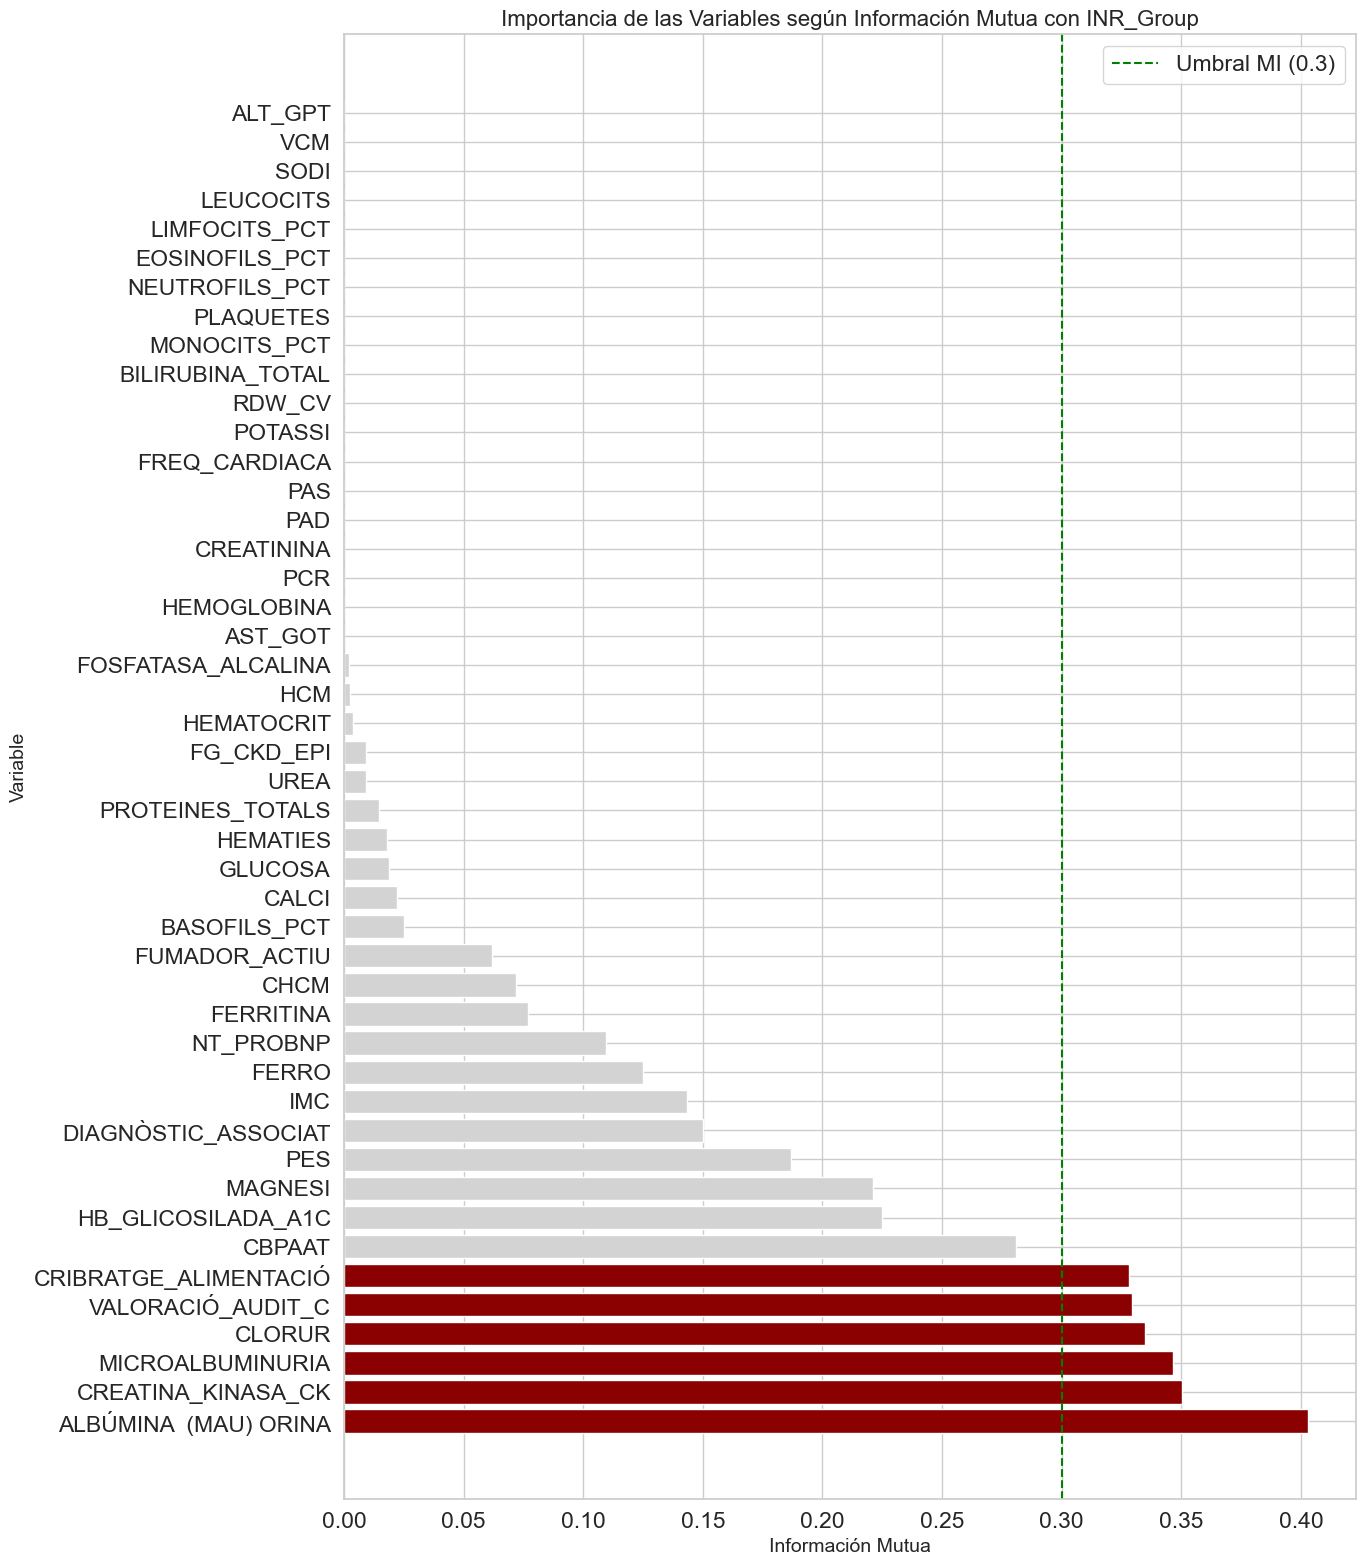

In [163]:

# Variable objetivo para MI
target_col = 'INR_Group'
threshold = 0.30
non_numeric_cols_to_keep = ["CODI_PACIENT", "DIAGNÒSTIC ASSOCIAT"]

# Identificar variables numéricas y categóricas
df_features = df_investig_INR.drop(columns=[target_col, 'CODI_PACIENT','INR'])

numeric_cols = df_features.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df_features.select_dtypes(include=['object', 'category']).columns.tolist()

# Convertir categóricas a numericas
df_encoded = df_features.copy()
for col in categorical_cols:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

# Indicar qué columnas son discretas (todas las categóricas codificadas)
discrete_features = [col in categorical_cols for col in df_encoded.columns]

# Calcular MI
X = df_encoded
y = df_investig_INR[target_col]
mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features, random_state=42)
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

# Filtrar variables que superan el umbral
selected_mi = mi_series[mi_series >= threshold]
print(selected_mi)

# Gráfico de Información Mutua
plt.figure(figsize=(14, 16))
sns.set_style("whitegrid")
plot_data = mi_series.reindex(mi_series.sort_values(ascending=False).index)
colors = ['darkred' if v >= threshold else 'lightgray' for v in plot_data.values]

plt.barh(plot_data.index, plot_data.values, color=colors)
plt.axvline(threshold, color='green', linestyle='--', linewidth=1.5, label=f'Umbral MI ({threshold})')
plt.title(f'Importancia de las Variables según Información Mutua con {target_col}', fontsize=16)
plt.xlabel('Información Mutua', fontsize=14)
plt.ylabel('Variable', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()


#### 2.4.3 Correlación

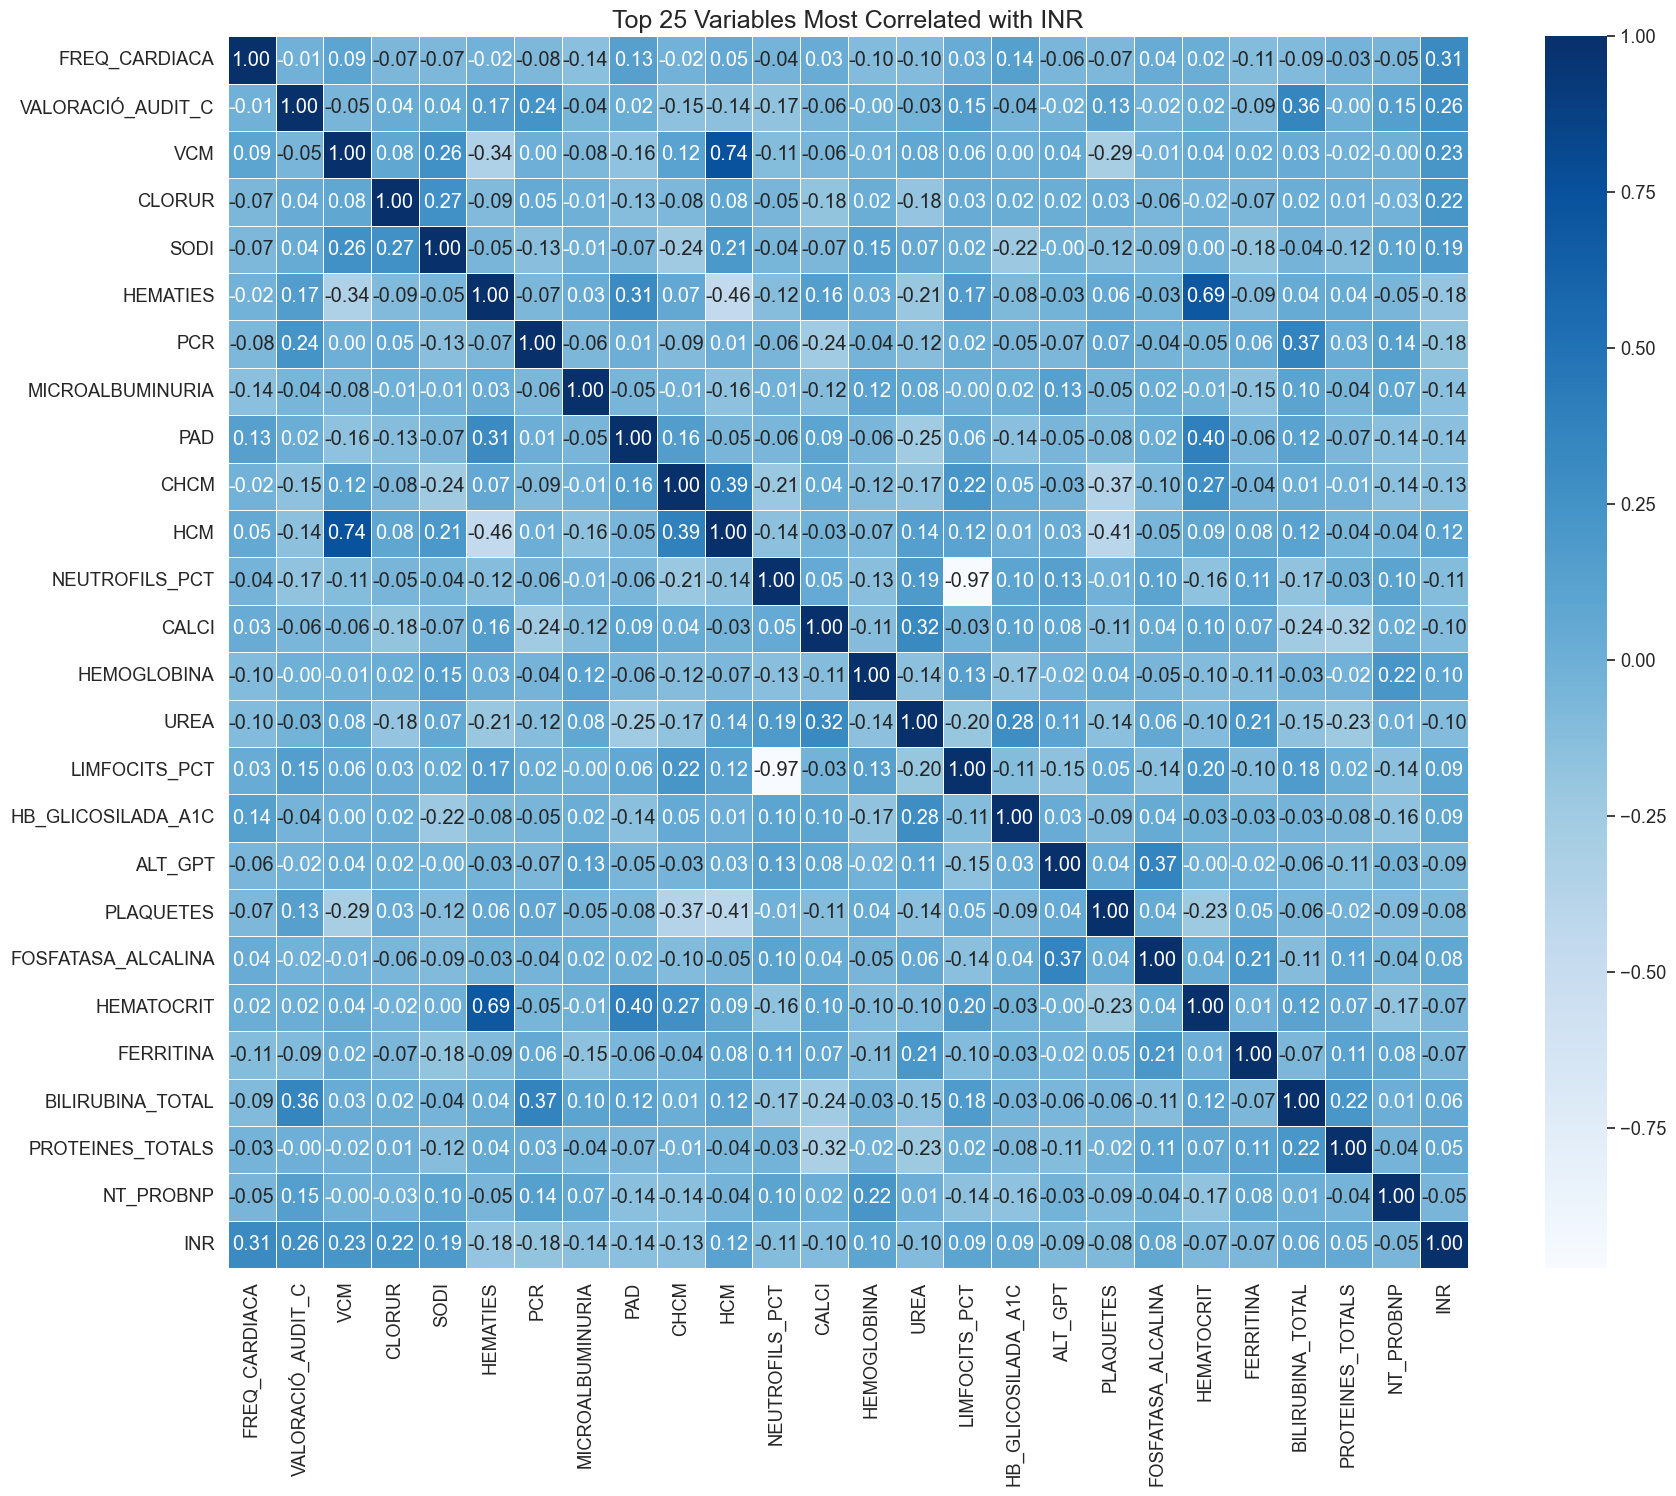

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Numeric columns without target
numeric_cols = [
    col for col in df_investig_INR.select_dtypes(include=np.number).columns
    if col not in ['INR']
]

target_col = 'INR'

# Pearson correlation matrix
corr_matrix = df_investig_INR[numeric_cols + [target_col]].corr(method='pearson')

# Correlation of all variables with INR
corr_with_inr = corr_matrix[target_col].drop(target_col).abs().sort_values(ascending=False)

# Select the top 25 columns
top_n = 25
top_cols = corr_with_inr.head(top_n).index.tolist()

# Include INR itself in the heatmap
cols_to_plot = top_cols + [target_col]

# Plot heatmap
plt.figure(figsize=(20, 16))  # Ampliamos el tamaño del gráfico
sns.set(font_scale=1.2)

sns.heatmap(
    corr_matrix.loc[cols_to_plot, cols_to_plot],
    annot=True,
    fmt=".2f",  # Redondea los floats a 2 decimales
    linewidths=.5,
    cmap="Blues"
)

plt.title(f'Top {top_n} Variables Most Correlated with INR', fontsize=18)
plt.show()


El análisis de la matriz de correlación, centrada en el INR (Razón Normalizada Internacional), revela que la variabilidad de este índice de coagulación no se explica de forma dominante por ninguna de las variables clínicas evaluadas, dado que las correlaciones más altas se mantienen en un rango bajo, no superando el valor de 0.26.

Este patrón sugiere que el INR es el resultado de una interacción compleja de factores, incluyendo la medicación anticoagulante, la dieta y la función hepática. No obstante, las asociaciones positivas débiles detectadas apuntan a posibles mecanismos indirectos.

Se observa que la mayor asociación positiva con el INR se presenta con la Valoración del resultado **AUDIT-C y con la Frecuencia Cardíaca, ambas con una correlación de 0.26.** La primera variable, al ser un indicador de cribado del consumo de alcohol, puede señalar una afectación de la función hepática, ya que el daño hepático crónico es una causa conocida de disminución en la síntesis de factores de coagulación, lo que se traduce en un INR elevado. La correlación con la Frecuencia Cardíaca, por su parte, probablemente refleja una asociación indirecta con la necesidad de tratamiento anticoagulante, común en pacientes con arritmias cardíacas que requieren mantener un INR en un rango terapéutico.

Otras variables, como el **Cloruro en Suero (0.20) y varios parámetros hematológicos (VCM, Hemoglobina, Hematocrito, entre 0.14 y 0.16)**, presentan correlaciones positivas aún más modestas con el INR, señalando influencias secundarias o el reflejo de una condición sistémica subyacente.

En el plano de las interrelaciones internas, la matriz evidencia una fuerte multicolinealidad dentro de los parámetros sanguíneos. **El VCM y la HCM se muestran casi idénticos (0.95)**, al igual que la **Hemoglobina y el Hematocrito (0.89)**. Estas relaciones de alta redundancia indican que, a efectos de modelado predictivo, sería necesario seleccionar únicamente una variable de cada par para garantizar la estabilidad del análisis. Por último, destaca la **correlación negativa moderada entre los Hematíes y la HCM (-0.49)**, lo que ilustra una relación inversa entre el número de glóbulos rojos y la cantidad de hemoglobina contenida en cada uno.

En resumen, los hallazgos sugieren que las influencias más significativas sobre el INR en este conjunto de datos provienen de factores relacionados con el estado hepático (alcohol) y las indicaciones clínicas para la anticoagulación (frecuencia cardíaca), aunque la predicción del INR requiere el análisis de múltiples variables en conjunto.

Tras completar los tres análisis —ANOVA para evaluar dependencia, Información Mutua para medir relevancia predictiva y Pearson para identificar relaciones lineales— se obtuvo una visión conjunta y más equilibrada de las variables que aportan información útil sobre el comportamiento del INR.

Este conjunto reducido se utilizará para realizar un análisis de pair plots con el fin de detectar visualmente valores atípicos.

#### 2.4.5 Pair plots para detectar visualmente valoes atípicos y potenciales relaciones entre variables

C:\Users\VALER\AppData\Local\Temp\ipykernel_11040\3796380258.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_investig_INR_plot['INR_Group'] = pd.cut(


Número de Pair Plots a generar: 1
Variables totales a plotear: 8

Guardado: pairplot_1_variables.png


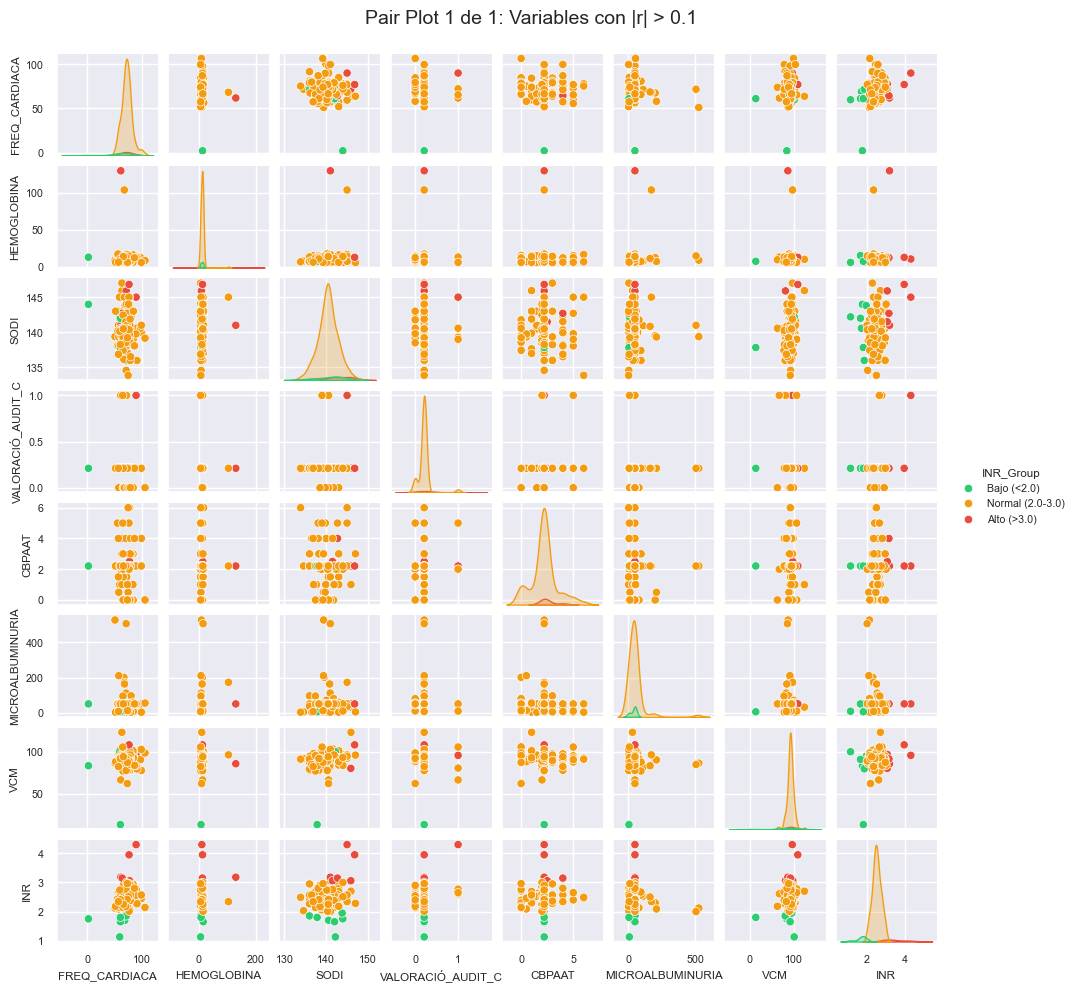

In [165]:
columns_to_keep = ['FREQ_CARDIACA', 'HEMOGLOBINA', 'SODI', 'VALORACIÓ_AUDIT_C','CBPAAT', 'MICROALBUMINURIA', 'VCM','INR']
df_investig_INR_plot = df_investig_INR[columns_to_keep]

# --- B. Preparación para el Ploteo en Subgrupos ---
target_col = 'INR'

# 3. Crear INR_Group
bins = [
    df_investig_INR_plot[target_col].min() - 1,
    2.0,
    3.0 + 1e-6,
    df_investig_INR_plot[target_col].max() + 1
]

df_investig_INR_plot['INR_Group'] = pd.cut(
    df_investig_INR_plot[target_col],
    bins=bins,
    labels=['Bajo (<2.0)', 'Normal (2.0-3.0)', 'Alto (>3.0)'],
    right=False,
    include_lowest=True
).astype('category')



# 4. Obtener variables numéricas
plot_features = df_investig_INR_plot.select_dtypes(include=np.number).columns.tolist()
if 'Id' in plot_features:
    plot_features.remove('Id')

# Usar todas las variables en un solo plot
chunks = [plot_features]

# 6. Configuración visual
colors = ["#2ecc71", "#f39c12", "#e74c3c"]
hue_order = ['Bajo (<2.0)', 'Normal (2.0-3.0)', 'Alto (>3.0)']

sns.set(font_scale=0.7)

threshold_display = 0.10

# --- C. Generar y guardar el Plot ---

print(f"Número de Pair Plots a generar: {len(chunks)}")
print(f"Variables totales a plotear: {len(plot_features)}\n")

for i, chunk in enumerate(chunks):
    plot_df = df_investig_INR_plot[chunk + ['INR_Group']]
    
    ax = sns.pairplot(
        plot_df,
        hue='INR_Group',
        palette=colors,
        hue_order=hue_order,
        height=1.2,
        aspect=1.0,
        kind="scatter",
        diag_kind="kde"
    )

    title = f'Pair Plot {i+1} de {len(chunks)}: Variables con |r| > {threshold_display}'
    ax.fig.suptitle(title, size=14, y=1.03)

    # ------------------------------------------------------------------
    # Guardar figura
    filename = f"pairplot_{i+1}_variables.png"
    ax.fig.savefig(filename, dpi=300, bbox_inches='tight')
    print(f"Guardado: {filename}")
    # ------------------------------------------------------------------

    plt.show()


El pair plot revela que la mayoría de los pacientes tienen niveles de INR Normal (2.0-3.0), dominando la distribución de todas las variables clínicas. Las variables clínicas como HEMOGLOBINA y VCM muestran una ausencia de correlaciones lineales fuertes entre sí, indicando que son relativamente independientes en este grupo. Los grupos de INR Bajo y Alto (los extremos de riesgo) no se separan ni se agrupan de manera distintiva en los planos de las variables clínicas. Esto sugiere que una predicción simple del grupo de INR a partir de estas variables será difícil, ya que los valores de riesgo se mezclan con los valores del grupo Normal en la mayoría de las comparaciones bivariadas.

#### 2.4.6 Distribución de frecuencias

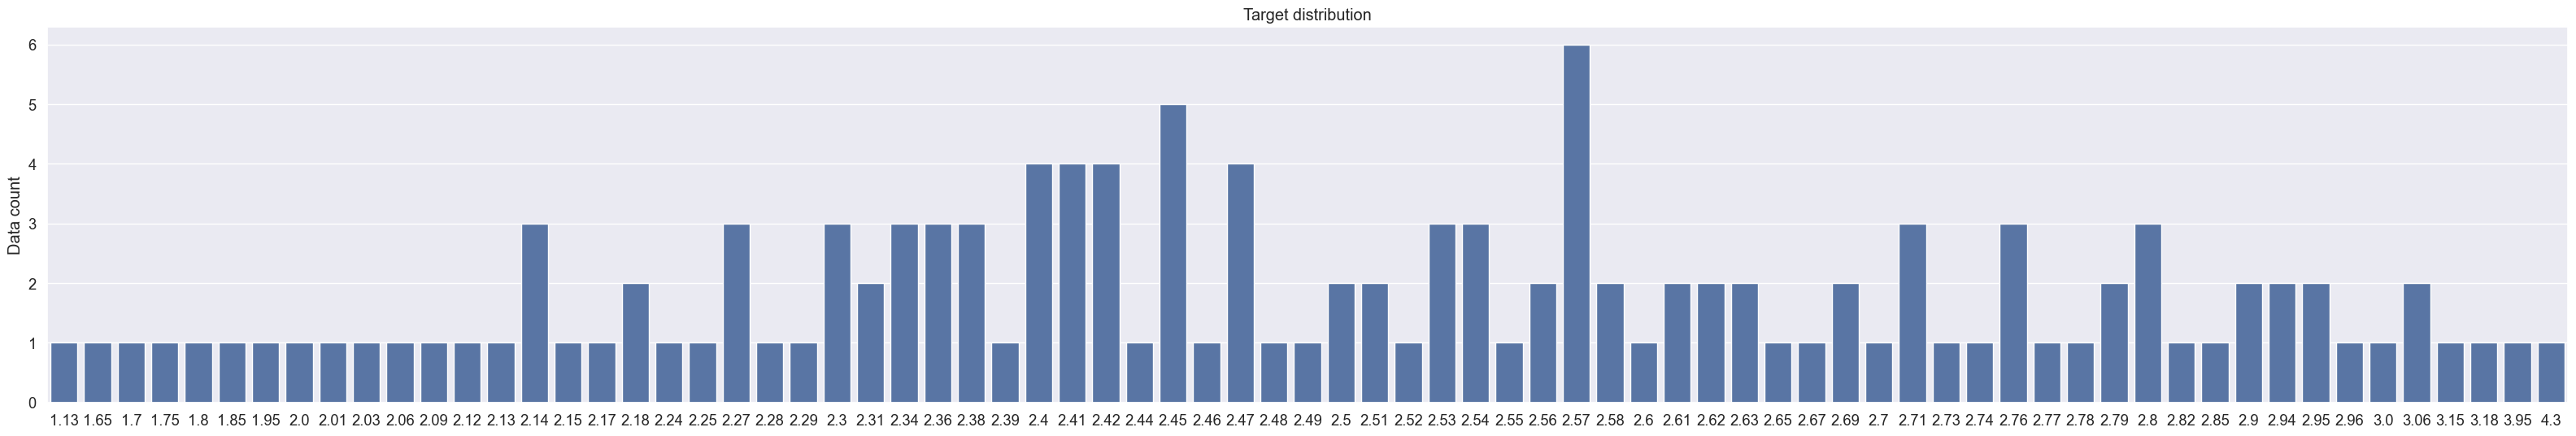

In [166]:
plt.figure(figsize=(40, 6))  # Ajusta los valores según lo grande que lo quieras

sns.set(font_scale=1.2)
sns.countplot(x="INR", data=df_investig_INR)

plt.ylabel("Data count")
plt.xlabel("")
plt.title("Target distribution")

plt.show()

--- Distribución de la Columna Target (INR_Group) ---
INR_Group
Normal (2.0-3.0)    120
Bajo (<2.0)           7
Alto (>3.0)           6
Name: count, dtype: int64


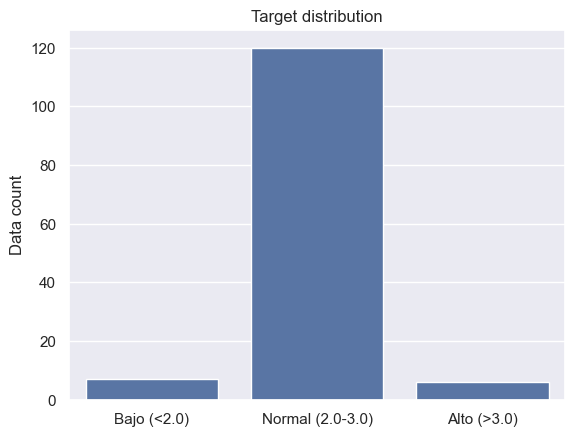

In [167]:
# 3. Crear la columna INR_Group (Necesaria para el 'hue' del pair plot)
sns.set(font_scale = 1)
sns.countplot(x="INR_Group", data=df_investig_INR).set(ylabel = "Data count"
            , xlabel = "")
plt.title('Target distribution')

print('--- Distribución de la Columna Target (INR_Group) ---')
conteo_inr = df_investig_INR['INR_Group'].value_counts()
print(conteo_inr)

La distribución de la variable objetivo INR_Group revela una marcada asimetría.La gran mayoría de las observaciones pertenecen a la categoría Normal (2.0-3.0), con un recuento de 120. En contraste, las categorías de interés clínico, Bajo (<2.0) y Alto (>3.0), son minorías muy reducidas, contando con solo 7 y 6 observaciones, respectivamente. Esta fuerte desproporción de clases (un dataset altamente desbalanceado) es un factor crítico que debe ser considerado en cualquier análisis o modelado subsiguiente, ya que el modelo tenderá a sesgarse hacia la clase mayoritaria.

#### 2.4.6 Variables categoricas

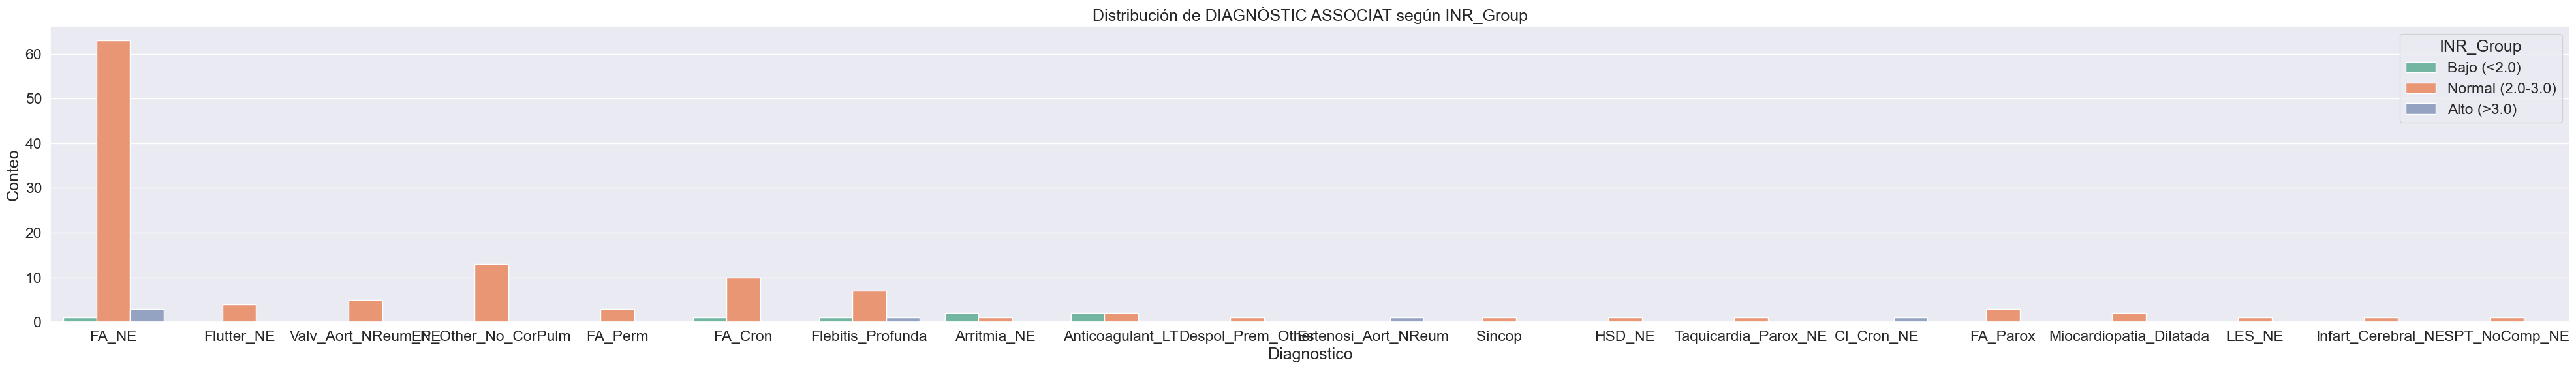

In [170]:
categorical = ['DIAGNÒSTIC_ASSOCIAT']

plt.figure(figsize=(40, 6))
sns.set(font_scale = 1.5)

sns.countplot(
    data=df_investig_INR,
    x='DIAGNÒSTIC_ASSOCIAT',
    hue='INR_Group',   # Usar la variable categórica de interés
    palette='Set2'
)

plt.title("Distribución de DIAGNÒSTIC ASSOCIAT según INR_Group")
plt.xlabel("Diagnostico")
plt.ylabel("Conteo")
plt.tight_layout()
plt.show()


El gráfico de barras presenta la distribución de los diferentes DIAGNÓSTICOS ASOCIADOS dentro de cada categoría de la variable objetivo, el INR_Group (Bajo, Normal, Alto).

Una observación inmediata es el dominio absoluto del grupo INR Normal (2.0-3.0), representado por las barras de color naranja, en la inmensa mayoría de los diagnósticos. Esta preponderancia refleja el desbalance de clases previamente identificado en el conjunto de datos.

El diagnóstico FA_NE (Fibrilación Auricular No Específica) es, con diferencia, el diagnóstico más frecuente en toda la cohorte, acumulando el mayor número de casos, casi todos ellos clasificados en el grupo INR Normal.

#### 2.3.3 Feature importance: conclusión

Estrategia de Modelado y Selección de Características Basada en Hallazgos Clínicos
El proceso de construcción del modelo requiere una selección estratégica de características, guiada por el análisis de correlación y la necesidad de gestionar la redundancia de datos.

El análisis de la matriz de correlación ha establecido que la variabilidad del INR no está dominada por una única variable clínica, dado que las correlaciones más altas observadas, como las de VALORACIÓ_AUDIT_C y FREQ_CARDIACA (ambas con un coeficiente de 0.26), son bajas. Estas asociaciones débiles sugieren que el INR es una variable de resultado multicausal que integra factores como la exposición a alcohol (AUDIT-C, indicador de la función hepática) y la necesidad de anticoagulación (FREQ_CARDIACA, asociada a arritmias).

Por otro lado, la matriz de interrelaciones internas subraya una fuerte multicolinealidad entre ciertos pares de parámetros sanguíneos: VCM y HCM (0.95), así como Hemoglobina y Hematocrito (0.89). Esta redundancia exige la selección de solo una variable por cada par para garantizar la estabilidad de los modelos durante el entrenamiento.

Fases de Modelado y Gestión de Características
Para abordar la tarea, se entrenarán diferentes arquitecturas de modelos con el objetivo de seleccionar el de mejor rendimiento. Durante esta fase, se evaluará rigurosamente el impacto de la inclusión o exclusión de variables mediante la verificación programática del rendimiento. Si la presencia o eliminación de una característica no afecta los resultados de un modelo específico, dicha característica se considera irrelevante para ese modelo y puede ser descartada para optimizar las fases posteriores de ajuste de parámetros, validación y prueba.

Además de la selección basada en correlación y redundancia, otras técnicas de ingeniería de características podrían ser consideradas:

Identificación de Colinealidades no Lineales: Se podría explorar la creación de características polinómicas o la aplicación de métodos de reducción de dimensionalidad como el Análisis de Componentes Principales (PCA) o el Análisis Discriminante Lineal (LDA) para simplificar el espacio de características.

Gestión del Desbalance de Clases: El conjunto de datos presenta un severo desbalance de clases en la variable objetivo INR_Group, donde la clase Normal es mayoritaria y las clases Bajo y Alto son minorías. Técnicas como SMOTE (Synthetic Minority Over-sampling Technique) podrían ser consideradas para mitigar este desequilibrio.

In [169]:
df_investig_INR.to_csv('df_investig_INR.csv')